In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("wasteindiaimport.csv")

In [9]:
df.head(10)

,HS CODE,PRODUCT DESCRIPTION,CONSIGNEE,CONSIGNEE ADDRESS,COUNTRY OF ORIGIN,ARRIVAL DATE,QUANTITY,UNIT,UNIT PRICE IN USD,CURRENCY,PRICE IN INR,TOTAL PRICE IN INR,INDIAN PORT,TRANSPORTATION TYPE,BILL OF LADING
0,39151000,MAGNETS,NORDEX INDIA PRIVATE LIMITED,,SPAIN,2022-09-03,9,PCS,3.53,EUR,284.38,2559.42,Madras Air,AIR,2289782
1,39151000,MAGNETS,NORDEX INDIA PRIVATE LIMITED,,SPAIN,2022-09-03,10,PCS,3.53,EUR,284.38,2843.80,Madras Air,AIR,2289782
2,39151000,MAGNETS,NORDEX INDIA PRIVATE LIMITED,,SPAIN,2022-09-03,38,PCS,3.53,EUR,284.38,10806.46,Madras Air,AIR,2289782
3,39151000,01X40'CONTAINER STC:PLASTIC POLYETHYLENE WASTE...,RENEW PLASTICS,,United States,2022-02-27,16,MTS,639.34,USD,48621.93,777950.90,Kandla-EPZ/SEZ,,
4,39151000,PLASTIC POLYETHYLENE WASTE-SCRAP NON-HAZARDOUS,SHIVAM SCRAP RECYCLING PVT LTD,,United States,2022-02-23,19,MTS,638.07,USD,48525.19,921978.58,Kandla-EPZ/SEZ,,
5,39151000,PLASTIC POLYETHYLENE WASTE - SCRAP NON HAZARDOUS,SHIVAM SCRAP RECYCLING PVT LTD,,United States,2022-02-23,20,MTS,664.04,USD,50500.41,1010008.24,Kandla-EPZ/SEZ,,
6,39151000,PLASTIC POLYETHYLENE WASTE-SCRAP NON-HAZARDOUS,SHIVAM SCRAP RECYCLING PVT LTD,,United States,2022-02-23,31,MTS,648.71,USD,49334.15,1529358.74,Kandla-EPZ/SEZ,,
7,39151000,PLASTIC POLYETHYLENE FILM IN BALES FOR RECYCLI...,MOKSHSTAR INTERNATIONAL,,United States,2022-02-21,17,MTS,488.54,USD,37153.57,631610.72,Kandla-EPZ/SEZ,,
8,39151000,PLASTIC POLYETHYLENE FILM IN BALES FOR RECYCLI...,MOKSHSTAR INTERNATIONAL,,United States,2022-02-21,39,MTS,565.59,USD,43012.78,1677498.60,Kandla-EPZ/SEZ,,
9,39151000,PLASTIC POLYETHYLENE FILM IN BALES FOR RECYCLI...,SATGURU POLYFAB PVT LTD,,United States,2022-02-21,39,MTS,566.00,USD,43043.98,1678715.16,Kandla-EPZ/SEZ,,


In [10]:
df.drop(columns=["INDIAN PORT", "BILL OF LADING", "PRICE IN INR", "TOTAL PRICE IN INR", "PRICE IN INR"], inplace = True)

In [17]:
df['MT QUANTITY'] = np.where(df['UNIT'] == 'KGS', df['QUANTITY'] / 1000,
                                  np.where(df['UNIT'] == 'MTS', df['QUANTITY'],
                                           df['QUANTITY'] * (5/3) / 1000))

In [22]:
df['MT UNIT PRICE IN USD'] = np.where(df['UNIT'] == 'KGS', df['UNIT PRICE IN USD'] * 1000,
                                  np.where(df['UNIT'] == 'MTS', df['UNIT PRICE IN USD'],
                                           df['UNIT PRICE IN USD'] / (5/3) * 1000))

In [34]:
df.head()

,HS CODE,PRODUCT DESCRIPTION,CONSIGNEE,CONSIGNEE ADDRESS,COUNTRY OF ORIGIN,ARRIVAL DATE,QUANTITY,UNIT,UNIT PRICE IN USD,CURRENCY,TRANSPORTATION TYPE,MT QUANTITY,MT UNIT PRICE IN USD
0,39151000,MAGNETS,NORDEX INDIA PRIVATE LIMITED,,SPAIN,2022-09-03,9,PCS,3.53,EUR,AIR,0.015000,2118.00
1,39151000,MAGNETS,NORDEX INDIA PRIVATE LIMITED,,SPAIN,2022-09-03,10,PCS,3.53,EUR,AIR,0.016667,2118.00
2,39151000,MAGNETS,NORDEX INDIA PRIVATE LIMITED,,SPAIN,2022-09-03,38,PCS,3.53,EUR,AIR,0.063333,2118.00
3,39151000,01X40'CONTAINER STC:PLASTIC POLYETHYLENE WASTE...,RENEW PLASTICS,,United States,2022-02-27,16,MTS,639.34,USD,,16.000000,639.34
4,39151000,PLASTIC POLYETHYLENE WASTE-SCRAP NON-HAZARDOUS,SHIVAM SCRAP RECYCLING PVT LTD,,United States,2022-02-23,19,MTS,638.07,USD,,19.000000,638.07


In [47]:
data_2022 = df[df["ARRIVAL DATE"] >= "2022"]
data_2022["RATIO"] = data_2022["MT QUANTITY"] / np.sum(data_2022['MT QUANTITY'])
avg_price_2022 = np.sum(data_2022["RATIO"] * data_2022["MT UNIT PRICE IN USD"])
avg_price_2022

/var/folders/c_/9slv16s13p50vtr162z5f8th0000gn/T/ipykernel_24038/3081562568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022["RATIO"] = data_2022["MT QUANTITY"] / np.sum(data_2022['MT QUANTITY'])


598.1988476042136

In [42]:
df[(df["ARRIVAL DATE"] < "2022") & (df["ARRIVAL DATE"] > "2019")]

,HS CODE,PRODUCT DESCRIPTION,CONSIGNEE,CONSIGNEE ADDRESS,COUNTRY OF ORIGIN,ARRIVAL DATE,QUANTITY,UNIT,UNIT PRICE IN USD,CURRENCY,TRANSPORTATION TYPE,MT QUANTITY,MT UNIT PRICE IN USD
62,39151000,KY1 AVN PANEL FILM,DMC AUTOMOTIVE PRIVATE LIMITED,,South Korea,2021-11-24,1000,PCS,0.73,USD,AIR,1.666667,438.0
63,39151000,KY1 D2V PANEL FILM,DMC AUTOMOTIVE PRIVATE LIMITED,,South Korea,2021-11-24,2000,PCS,0.73,USD,AIR,3.333333,438.0
64,39151000,PLASTIC WASTE/SCRAP (NON TOXIC / NON HAZARDOUS) -,"AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-06-15,16928,KGS,0.40,USD,,16.928000,400.0
65,39151000,PLASTIC WASTE/SCRAP ( NON TOXIC /NON HAZARDOUS) -,"AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-05-23,72376,KGS,0.00,USD,,72.376000,0.0
66,39151000,PLASTIC WASTE/SCRAP (NON TOXIC / NON HAZARDOUS...,"AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-05-03,18652,KGS,0.00,USD,,18.652000,0.0
67,39151000,PLASTIC WASTE/SCRAP (NON TOXIC / NON HAZARDOUS...,"AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-05-01,39090,KGS,0.00,USD,,39.090000,0.0
68,39151000,PLASTIC WASTE/SCRAP (NON TOXIC / NON HAZARDOUS...,"AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-05-01,19454,KGS,0.00,USD,,19.454000,0.0
69,39151000,"FILM,LDPE C2.25 BU 61'(8000 LY) -","AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-03-30,20810,KGS,0.28,USD,,20.810000,280.0
70,39151000,"FILM,LDPE C2.25 BU 61'(8000 LY) -","AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-03-30,17118,KGS,0.28,USD,,17.118000,280.0
71,39151000,"FILM,LDPE C2.25 BU 61'(8000 LY) -","AASU PLASTICS PVT.LTD.,",,UNITED STATES,2019-03-16,33838,KGS,0.28,USD,,33.838000,280.0


In [43]:
data_2021 = df[(df["ARRIVAL DATE"] < "2022") & (df["ARRIVAL DATE"] > "2021")]
data_2021["RATIO"] = data_2021["MT QUANTITY"] / np.sum(data_2021['MT QUANTITY'])
avg_price_2021 = np.sum(data_2021["RATIO"] * data_2021["MT UNIT PRICE IN USD"])
avg_price_2021

/var/folders/c_/9slv16s13p50vtr162z5f8th0000gn/T/ipykernel_24038/626586704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["RATIO"] = data_2021["MT QUANTITY"] / np.sum(data_2021['MT QUANTITY'])


438.0

In [44]:
data_2020 = df[(df["ARRIVAL DATE"] < "2021") & (df["ARRIVAL DATE"] > "2020")]
data_2020["RATIO"] = data_2020["MT QUANTITY"] / np.sum(data_2020['MT QUANTITY'])
avg_price_2020 = np.sum(data_2020["RATIO"] * data_2020["MT UNIT PRICE IN USD"])
avg_price_2020

0.0

In [45]:
data_2019 = df[(df["ARRIVAL DATE"] < "2020") & (df["ARRIVAL DATE"] >= "2019")]
data_2019["RATIO"] = data_2019["MT QUANTITY"] / np.sum(data_2019['MT QUANTITY'])
avg_price_2019 = np.sum(data_2019["RATIO"] * data_2019["MT UNIT PRICE IN USD"])
avg_price_2019

/var/folders/c_/9slv16s13p50vtr162z5f8th0000gn/T/ipykernel_24038/3262513546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019["RATIO"] = data_2019["MT QUANTITY"] / np.sum(data_2019['MT QUANTITY'])


191.99838290188256

In [46]:
data_2018 = df[(df["ARRIVAL DATE"] < "2019") & (df["ARRIVAL DATE"] >= "2018")]
data_2018["RATIO"] = data_2018["MT QUANTITY"] / np.sum(data_2018['MT QUANTITY'])
avg_price_2018 = np.sum(data_2018["RATIO"] * data_2018["MT UNIT PRICE IN USD"])
avg_price_2018

/var/folders/c_/9slv16s13p50vtr162z5f8th0000gn/T/ipykernel_24038/515174214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018["RATIO"] = data_2018["MT QUANTITY"] / np.sum(data_2018['MT QUANTITY'])


311.6164771475947

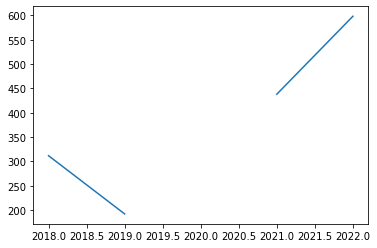

In [50]:
x = [2018, 2019, 2020, 2021, 2022]
y = [311.61, 191.99, np.NAN, 438, 598.19]

plt.plot(x,y)